In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
df = df.drop(['area_type' , 'society' , 'balcony' , 'availability'] , axis = 'columns')

In [8]:
df.shape

(13320, 5)

In [9]:
dict(df.isnull()).keys()

dict_keys(['location', 'size', 'total_sqft', 'bath', 'price'])

In [10]:
df.shape

(13320, 5)

In [11]:
df = df.dropna()
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df.shape

(13246, 5)

# FEATURE ENGINEERING

In [13]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df[df['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [16]:
df[~df['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [17]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2 :
        return (float(tokens[0])+ float(tokens[1]))/2
    try :
        return float(x)
    except :
        return None 

In [18]:
df1 = df.copy()
df1.total_sqft = df.total_sqft.apply(convert_sqft_to_num)
df1 = df1[df1.total_sqft.notnull()]   # excluding nulls in case of conversions of strings like meter , perch , etc .

In [19]:
df.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4


In [20]:
df1[~df1['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk


In [21]:
df1.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

## Adding a new feature for price predictions

In [22]:
df2 = df1.copy()
df2['price_per_sqft'] = df2['price']*100000/df2['total_sqft']
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [23]:
df2['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [24]:
df2.location = df2.location.apply(lambda x: x.strip())
location_stats = df2['location'].value_counts(ascending=False)
location_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [25]:
len(location_stats)

1287

In [26]:
len(location_stats[location_stats<=10])

1047

### Since out of 1287 , 1047 location_stats have count less than 10 , we can put them under teh category of others

In [27]:
df2.location = df2.location.apply(lambda x: 'other' if x in location_stats[location_stats<=10] else x)

In [28]:
len(df2.location.unique())

241

## REMOVING THE OUTLIERS 

In [29]:
df2[df2.total_sqft/df2.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [30]:
df2 = df2[~(df2.total_sqft/df2.bhk<300)]
df2.shape

(12456, 7)

In [31]:
df2.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [32]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df2 = remove_pps_outliers(df2)
df2.shape

(10242, 7)

## CHECKING THE 2 BHK AND 3 BHK PROPERTY PRICES PREDICTIONS

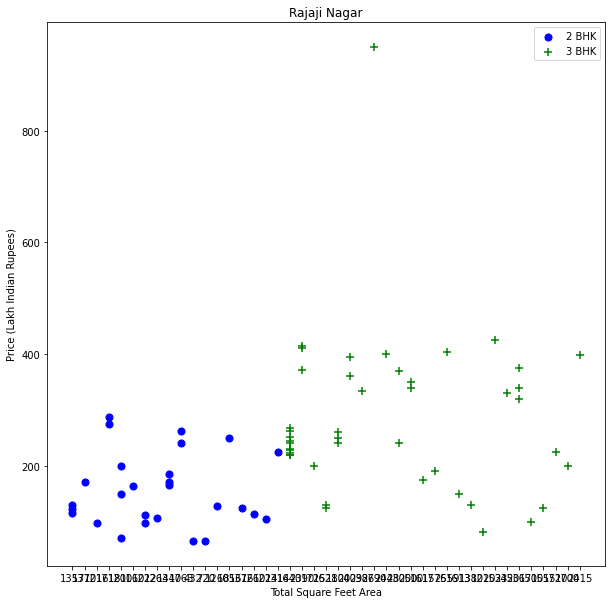

In [33]:
location = 'Rajaji Nagar';
def plot_chart(location = None):
    bhk2 = df[(df.location==location)&(df.bhk == 2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.pyplot.rcParams["figure.figsize"] = (10 , 10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
plot_chart('Rajaji Nagar')

In [34]:
def remove_bhk_outliers(df):

    exclude_indices = np.array([])
    for location , location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk , bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft) , 
                'std' : np.std(bhk_df.price_per_sqft) , 
                'count' : bhk_df.shape[0]
            }
        
        for bhk , bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(np.array(exclude_indices) , axis = 'index')
        
df3 = remove_bhk_outliers(df2)

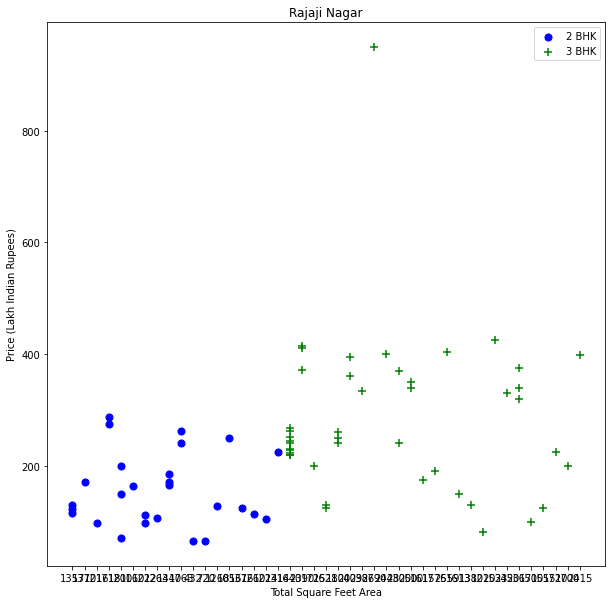

In [35]:
plot_chart('Rajaji Nagar')

In [36]:
df3.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [37]:
df3[df3.bath>df3.bhk + 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [38]:
df3 = df3[df3.bath<df3.bhk+2]
df3.shape

(7239, 7)

In [39]:
df3 = df3.drop(['size','price_per_sqft'],axis='columns')
df3.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


## Using one hot encoding

In [40]:
dummies = pd.get_dummies(df3.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
housing = pd.concat([df3,dummies.drop('other',axis='columns')],axis='columns')

In [42]:
housing = housing.drop('location',axis='columns')

In [43]:
housing['Rajaji Nagar']

0        0
1        0
2        0
3        0
4        0
        ..
10233    0
10234    0
10237    0
10238    0
10241    0
Name: Rajaji Nagar, Length: 7239, dtype: uint8

In [44]:
housing.shape

(7239, 244)

In [49]:
housing.shape
x = housing.drop(['price'] , axis = 'columns')
x.head(3)
x.shape

(7239, 243)

In [50]:
y = housing.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [51]:
len(y)

7239

In [66]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavi

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


,model,best_score,best_params
0,linear_regression,0.847796,{'normalize': False}
1,lasso,0.726785,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.718922,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8629132245229447

In [69]:
import pickle
with open('model/model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [74]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]   # svaing all the columns of teh x
}
with open("model/columns.json","w") as f:
    f.write(json.dumps(columns))

In [75]:
print(columns)

{'data_columns': ['total_sqft', 'bath', 'bhk', '1st block jayanagar', '1st phase jp nagar', '2nd phase judicial layout', '2nd stage nagarbhavi', '5th block hbr layout', '5th phase jp nagar', '6th phase jp nagar', '7th phase jp nagar', '8th phase jp nagar', '9th phase jp nagar', 'aecs layout', 'abbigere', 'akshaya nagar', 'ambalipura', 'ambedkar nagar', 'amruthahalli', 'anandapura', 'ananth nagar', 'anekal', 'anjanapura', 'ardendale', 'arekere', 'attibele', 'beml layout', 'btm 2nd stage', 'btm layout', 'babusapalaya', 'badavala nagar', 'balagere', 'banashankari', 'banashankari stage ii', 'banashankari stage iii', 'banashankari stage v', 'banashankari stage vi', 'banaswadi', 'banjara layout', 'bannerghatta', 'bannerghatta road', 'basavangudi', 'basaveshwara nagar', 'battarahalli', 'begur', 'begur road', 'bellandur', 'benson town', 'bharathi nagar', 'bhoganhalli', 'billekahalli', 'binny pete', 'bisuvanahalli', 'bommanahalli', 'bommasandra', 'bommasandra industrial area', 'bommenahalli', '